<a href="https://colab.research.google.com/github/alouwyck/vives-machine-learning-translated/blob/main/10_decision_trees/3_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

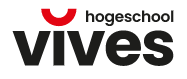<br>


**MACHINE LEARNING FUNDAMENTALS**<br>Andy Louwyck

---



---



# **DECISION TREES - ID3 ALGORITHM**

The text of this notebook is largely taken from the chapter "Decision Trees" of the course Data Science I taught at the Karel de Grote University College of Antwerp and compiled by Wouter Deketelaere in 2017. The calculation examples in the text were additionally coded with Python.

## Introduction

A **decision tree** is a graphical tool that can be used to facilitate decision making. There are several machine learning algorithms that can produce decision trees based on a training set of examples. Each example in the training set is also called an **instance**. How this works is explained in this notebook.

Once the decision tree has been constructed, it can be used as a model to, for example, perform the classification of unknown instances. This has many practical applications ranging from predicting interesting times to buy shares, determining whether someone is creditworthy when taking out a loan, detecting tumors in photos, predicting the chance of passing a certain course for students, and so on.

The basic principles of decision trees were already laid in the 1970s by Breiman et al. (1984). The best-known algorithm for creating decision trees, called **ID3**, was developed by Quinlan (1986). Later, in the 1990s, Quinlan improved this algorithm under the name **C4.5**, so that it can also be applied to continuous data and to data with missing values ​​(Salzberg, 1994).

In this chapter, we will study what a decision tree is, and learn how to construct a decision tree using the ID3 algorithm starting from a set of training data.

## Definition

As the word decision tree suggests, it is a tree-like structure, but upside down, consisting of **nodes** connected by **named arrows**. Each node corresponds to a place where a decision has to be made. The ends of a decision tree are nodes without outgoing arrows and these are called **leaf nodes**. Each node contains the name of a property (English: **attribute**) of the data by which examples can be separated from each other. A leaf node contains the outcome (English: **target**) to which the example belongs.

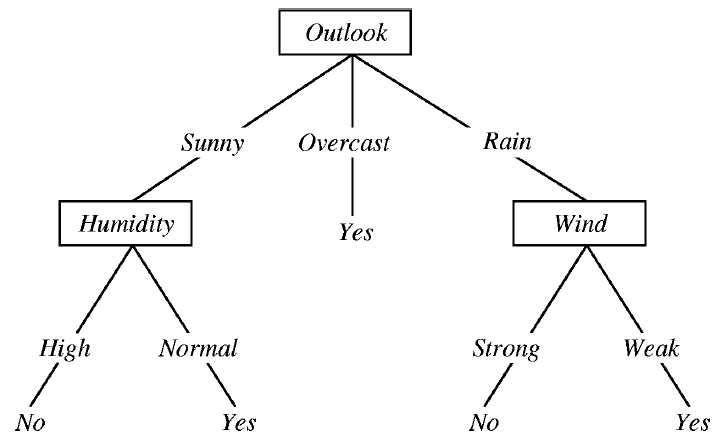

The figure is an example of a decision tree that is very well known in the literature. This decision tree is the result of applying the ID3 algorithm to the training data that we find in the file `play.txt`:

In [ ]:
import pandas as pd

play = pd.read_csv('play.txt', sep=' ').iloc[:, :-1] # discard last column...
play

,Day,Outlook,Temperature,Humidity,Wind,Play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


The goal of the decision tree is to determine whether a person will exercise (the 'Play' property with values ​​`'Yes'` or `'No'`) based on the other properties ('Outlook', 'Temperature', 'Humidity' and 'Wind') of a day. The ID3 algorithm learns the knowledge hidden in this table and builds a model from it. That model can then be used to determine whether someone will exercise on day 15, 16, ... by only using the other properties of those days. Note that all properties in this example have a nominal or ordinal level of measurement, but in the general case this does not have to be the case.

## ID3 algorithm

You are probably wondering how to construct such a decision tree? We will tackle this problem in steps, and some of these steps in turn require a number of underlying steps.

These are the steps we distinguish:
1. Select the best property based on the data you are considering.
2. Create a node with the name of this property in it.
3. Draw an arrow from this node for each value that the chosen property can take.
4. Divide the examples into sets according to the value they have of the chosen property.
5. Repeat the algorithm for each of the obtained subsets of the data.
6. Stop when a subset only contains examples with one and the same outcome.

This is a recursive algorithm known as ID3. The ID3 algorithm only works for data with nominal or ordinal measurement levels. If you do have data at a higher measurement level such as interval or ratio, you will first need to create classes. Another term for creating classes is *discretize*; you will often encounter this latter term in software packages. Once all your properties have been discretized, you can use the ID3 algorithm again to create a decision tree.

We give an example to clarify the steps in the algorithm:
1. Select property 'Outlook'.
2. Create a node with the name 'Outlook'.
3. Draw three named arrows that start from the node: an arrow with 'Sunny', 'Overcast' and 'Rain'.
4. We obtain three subsets of the original data set:
* D1, D2, D8, D9, D11
* D3, D7, D12, D13
* D4, D5, D6, D10, D14
5. We repeat the algorithm for subsets 1 and 3.
6. We stop the algorithm for subset 2 because they all have the same result `'Yes'`.

## Entropy and Information Gain

In the above algorithm we have not mentioned how to select the best feature. There are several ways to select the 'best' feature. In the next paragraph we will look at one of the most well-known techniques, which is based on the concepts of *entropy* and *information gain*.

### Entropy

The entropy of a table of data is a measure of the purity of the data, measured according to a certain property. If you reread the ID3 algorithm above, you will notice that the stopping condition is based on entropy: you stop expanding the decision tree when 'all have the same outcome'. Entropy will give us an exact mathematical way to calculate this.

**Definition**:

> $E(S) = \sum_{v \in A} - \dfrac{|S_{A=v}|}{|S|}.log_2 \dfrac{|S_{A=v}|}{|S |}$

(formula 1)

The formula looks quite impressive, but in fact it is much simpler than it makes
sound. Let's look at the different parts and apply them to our example.

First we need to understand what each symbol stands for:

- $S$ is the set of data, our dataset. This is nothing more than the table of
data that we have read in as a data frame.
- $E$ stands for entropy. In binary variables this is a number between 0 and 1 that indicates how pure the set $S$ of data is: 0 corresponds to a completely pure set and 1 to a
maximally impure set.
- $A$ stands for attribute or property. This is the attribute whose purity we want to
calculate, for example $A$ = 'Play'.
- $v$ stands for value. It is in fact a variable that can take on all values ​​of $A$. In
the case of $A$ = 'Play', $v$ can take on the values ​​`'Yes'` and `'No'`.

- $|S_{A=v}|$ is the number of instances (or rows in our table) that have the value $v$ for attribute
$A$.
- $|S|$ is the total number of instances, so the total number of rows in the table.
- $\dfrac{|S_{A=v}|}{|S|}$ is actually a relative frequency, which can be interpreted as a probability!

We calculate the entropy $E$ of the data $S$ considering 'Play' as the target attribute (or label):

> $E(S) = \sum_{v \in \{Yes, No\}} - \dfrac{|S_{Play=v}|}{|S|}.log_2 \dfrac{|S_{Play=v}|}{|S|}$

> $E(S) = -\dfrac{9}{14}.log_2 \dfrac{9}{14} -\dfrac{5}{14}.log_2 \dfrac{5}{14} = 0.94$

Now let's code that:

In [ ]:
n = len(play) # total number of rows
n_yes = (play['Play'] == 'Yes').sum() # number of Play = 'Yes'
n_no = (play['Play'] == 'No').sum() # number of Play = 'No'

print('total number:', n)
print("number 'Yes':", n_yes)
print("number 'No':", n_no)

totaal aantal: 14
aantal 'Yes': 9
aantal 'No': 5


In [ ]:
import numpy as np

f_yes = n_yes / n
f_no = n_no / n
E = -f_yes * np.log2(f_yes) - f_no * np.log2(f_no) # beware! log2!!
print('E =', E)

E = 0.9402859586706311


Of course we can write this more generically in a function `entropy`:

In [ ]:
def entropy(df, target):
    n = len(df)
    E = 0.0
    for v in np.unique(df[target]):
        f = (df[target] == ​​v).sum() / n
        E -= f * np.log2(f)
    return E

print('E =', entropy(play, 'Play'))

E = 0.9402859586706311


But we can also vectorize that and write it in one line of code!

In [ ]:
E = lambda x: -x * np.log2(x) print('E =', (play.value_counts('Play') / len(play)).apply(E).sum())

E = 0.9402859586706311


The value we find is close to 1. This means that the attribute 'Play' is very impure. If there were as many days on which sports are played as there are days on which there are no sports, then the entropy of 'Play' would even have been exactly 1 (just calculate this).

The entropy curve in the figure below shows how the entropy of a binary variable such as 'Play' increases to 1 when the probability of both values ​​becomes 0.5. (Remember that a binary variable is a random variable that can only take two values.) In the case of the 'Play' attribute, the probability of 'Yes' is equal to 9/14 = 0.64, and there is therefore a slightly higher probability of 'Yes' than of 'No'. This is also reflected in the calculated value of E(S) which is slightly lower than 1.

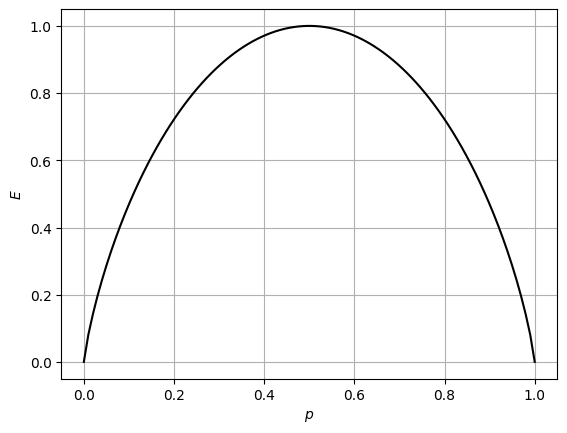

In [ ]:
from matplotlib import pyplot as plt

p = np.linspace(1e-10, 1-1e-10, 100) # 1e-10 to avoid dividing by 0!
E = -p * np.log2(p) - (1-p) * np.log2(1-p)

plt.plot(p, E, 'k-');
plt.grid()
plt.xlabel('$p$');
plt.ylabel('$E$');

### Information Gain

With the information gain (IG) we will be able to quantify for each attribute what the gain will be in terms of 'increase in purity' after splitting the data based on the values ​​of that attribute. The higher the information gain for a certain attribute the better. We first give the formal definition of information gain of an attribute A.

**Definition**:

> $IG(A) = E(S_{parent}) - \sum_{v \in A} \dfrac{|S_{child,v}|}{|S_{parent}|}.E(S_{child,v})$

(formula 2)

This formula looks a bit impressive again, but again it is not that difficult. This formula has an intuitive meaning that makes it easier to understand. Later we will formulate this intuitive meaning so that you can get a better insight into its meaning.

In order to understand the calculation method of information gain, it is important that you now understand what the ID3 algorithm entails. We want to use a table $S$ with data to create a decision tree. Because it is a recursive algorithm, we will always have to deal with a parent table $S_{parent}$ and a number of child tables $S_{child,v}$. The first parent table is the original table $S$ with data, such as the data frame that we read from the file "play.txt" above. For each attribute $A$ for which you are going to calculate the information gain, child tables will be created: one child table per value $v$ that the attribute $A$ can assume. When all information gains have been calculated, the table can be split based on the attribute with the largest information gain. The child tables that are then created will in turn serve as parent tables and the algorithm will not stop until all child tables are pure. In other words, as long as a child table is not pure, it becomes a parent table and the split continues.

In the weather data example, to calculate the information gain of the "Outlook" attribute, you have three child tables, one for each value that the "Outlook" attribute can take:

In [ ]:
for v in np.unique(play['Outlook']): # loop through all values ​​for 'Outlook'
print(play[play['Outlook'] == v]) # child table
print()

    Day   Outlook Temperature Humidity    Wind Play
2    D3  Overcast         Hot     High    Weak  Yes
6    D7  Overcast        Cool   Normal  Strong  Yes
11  D12  Overcast        Mild     High  Strong  Yes
12  D13  Overcast         Hot   Normal    Weak  Yes

    Day Outlook Temperature Humidity    Wind Play
3    D4    Rain        Mild     High    Weak  Yes
4    D5    Rain        Cool   Normal    Weak  Yes
5    D6    Rain        Cool   Normal  Strong   No
9   D10    Rain        Mild   Normal    Weak  Yes
13  D14    Rain        Mild     High  Strong   No

    Day Outlook Temperature Humidity    Wind Play
0    D1   Sunny         Hot     High    Weak   No
1    D2   Sunny         Hot     High  Strong   No
7    D8   Sunny        Mild     High    Weak   No
8    D9   Sunny        Cool   Normal    Weak  Yes
10  D11   Sunny        Mild   Normal  Strong  Yes



For each of these child tables, you can calculate the entropy $E(S_{child,v})$ using formula 1 that we gave above. We have already calculated the entropy of the parent table $E(S_{parent})$ above. So we still have to calculate the entropy for all child tables.

1. Child table 'Sunny': > $E(S_{Sunny}) = \sum_{v \in \{Yes, No\}} - \dfrac{|S_{Sunny,Play=v}|}{|S_{Sunny}|}.log_2 \dfrac{|S_{Sunny,Play=v}|}{|S_{Sunny}|}$ > $E(S_{Sunny}) = -\dfrac{2}{5}.log _2 \dfrac{2}{5} -\dfrac{3}{5}.log_2 \dfrac{3}{5} = 0.97$ 2. Child table 'Rain': > $E(S_{Rain}) = \sum_{v \in \{Yes, No\}} - \dfrac{|S_{Rain,Play=v}|}{|S_{Rain}|}.log_2 \dfrac{|S_{Rain,Play=v}|}{|S_{Rain}|}$ > $E(S_{Rain}) = -\dfrac{3}{5}.log_2 \dfrac{3}{5} -\dfrac{2}{5}.log_2 \dfrac{2}{5} = 0.97$ 3. Child table 'Overcast': > $E(S_{Overcast}) = \sum_{v \in \{Yes, No\}} - \dfrac{|S_{Overcast,Play=v}|}{|S_{Overcast}|}.log_2 \dfrac{|S_{Overcast,Play=v}|}{|S_{Overcast}|}$ > $E(S_{Overcast}) = -\dfrac{4}{4}.log_2 \dfrac{4}{4} -\dfrac{0}{4}.log_2 \dfrac{0}{4} = 0$

Of course we can also code this as we did above:

In [ ]:
for v in np.unique(play['Outlook']): # loop through all values ​​for 'Outlook'
child = play[play['Outlook'] == v] # child table
E_child = (child.value_counts('Play') / len(child)).apply(E).sum()
print('E(Outlook=', v,') = ', E_child, sep='') # Entropy of the child table

E(Outlook=Overcast) = 0.0
E(Outlook=Rain) = 0.9709505944546686
E(Outlook=Sunny) = 0.9709505944546686


The intuitive meaning of information gain can now be understood as follows: the information gain is equal to the impurity of the original table $S_{parent}$ minus the weighted average of the impurities of the child tables $S_{child,v}$. Our parent table is fairly impure, because $E=$ 0.94. After splitting on the attribute 'Outlook' we obtain three child tables, two of which are still fairly impure: $E(S_{Sunny})=E(S_{Rain})=$ 0.97. The third table is perfectly pure because the entropy is zero: $E(S_{Overcast})=$ 0. By calculating the weighted average of the entropies of the obtained child tables we obtain one measure that characterizes the quality of the split in terms of purity.

Now what is the *average* 'purity change' if we were to split into these three tables? Well, that of course depends on how big each child table is. You intuitively feel that each child table should get a larger share in the total 'purity improvement' when it is a large subtable than when it is just a small table of, for example, one row. And the size of the child table is of course relative to the size
$|S_{parent}|$ of the original parent table $S_{parent}$. That is why in formula 2 we relate the number of elements of each child table $|S_{child,v}|$ to the number of elements in the parent table $|S_{parent}|$. By taking the difference between the original purity $E(S_{parent})$ and the weighted composite purity
of the child tables, we indeed obtain a number that tells us how much 'purity change' will take place if we were to split on that attribute.

> $IG(Outlook) = E(S_{parent}) - \sum_{v \in \{Sunny,Rain,Overcast\}} - \dfrac{|S_{child,v}|}{|S_{parent} |}.E(S_{child,v})$ > $E(Outlook) = 0.94 - \dfrac{5}{14} . 0.97 - \dfrac{5}{14} . 0.97 - \dfrac{4}{14} . 0 = 0.25$

Of course we are going to code that and we do that neatly using a function `information_gain`:

In [ ]:
def information_gain(parent, target, attr):
"""
calculate information gain for parent table 'parent' where we predict 'target'
and want to split on feature 'attr'

parent: pandas DataFrame
target: column name - string
attr: column name - string
"""
E = lambda x: -x * np.log2(x) # entropy E
n_parent = len(parent) # number of elements in parent table
E_parent = (parent.value_counts(target) / len(parent)).apply(E).sum() # E parent table
IG = E_parent # initialize information gain IG
for v in np.unique(parent[attr]): # overflow all values ​​for attr
child = parent[parent[attr] == v] # child table
n_child = len(child) # number of elements in child table
E_child = (child.value_counts(target) / len(child)).apply(E).sum() # E child table IG -= n_child / n_parent * E_child # information gain update IG return IG # output is IG

Now let's test this on the 'play' table where we split on 'Outlook' as above:

In [ ]:
information_gain(play, 'Play', 'Outlook')

0.24674981977443933

We indeed get an information gain of 0.25 rounded off.

We now have to repeat all these calculations for the remaining attributes "Temperature", "Humidity" and "Wind", and that is quite a bit of work if we have to do it manually, but luckily with our function `information_gain` from above we know how to fix that:

In [ ]:
for attr in ['Outlook', 'Temperature', 'Humidity', 'Wind']:
    print('IG(', attr,') = ', information_gain(play, target='Play', attr=attr), sep='')

IG(Outlook) = 0.24674981977443933
IG(Temperature) = 0.02922256565895487
IG(Humidity) = 0.15183550136234164
IG(Wind) = 0.04812703040826949


The information gain of "Outlook" has the highest value. So we split the original table using the "Outlook" attribute into the three child tables we indicated above. Only now do we know the first node of our decision tree: a node labeled "Outlook" with three outgoing arrows for each of the values ​​that attribute can take.

Remember that the "Overcast" child table was perfectly clean (entropy was zero), so we don't need to split it up any further. The other two, we do! Let's start with "Sunny":

In [ ]:
sunny = play[play['Outlook'] == 'Sunny'] sunny

,Day,Outlook,Temperature,Humidity,Wind,Play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
10,D11,Sunny,Mild,Normal,Strong,Yes


The information gain for the different attributes that remain:

In [ ]:
for attr in ['Temperature', 'Humidity', 'Wind']: print('IG(', attr,') = ', information_gain(sunny, target='Play', attr=attr), sep='' )

IG(Temperature) = 0.5709505944546686
IG(Humidity) = 0.9709505944546686
IG(Wind) = 0.01997309402197489


Clearly we need to split here on “Humidity”!

And finally we have the "Rain" child table:

In [ ]:
rain = play[play['Outlook'] == 'Rain'] rain

,Day,Outlook,Temperature,Humidity,Wind,Play
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
9,D10,Rain,Mild,Normal,Weak,Yes
13,D14,Rain,Mild,High,Strong,No


In [ ]:
for attr in ['Temperature', 'Humidity', 'Wind']: print('IG(', attr,') = ', information_gain(rain, target='Play', attr=attr), sep='' )

IG(Temperature) = 0.01997309402197489
IG(Humidity) = 0.01997309402197489
IG(Wind) = 0.9709505944546686


Here we clearly have to split on "Wind"!

And so we end up with the decision tree we showed earlier:
- First we look at "Outlook".
- If "Outlook" is equal to "Sunny", then we look at "Humidity".
- If "Humidity" is equal to "High", then we don't play tennis.
- If "Humidity" is equal to "Normal", then we do play tennis.
- If "Outlook" is equal to "Overcast", then we do play tennis.
- If "Outlook" is equal to "Rain", then we look at "Wind".
- If "Wind" is equal to "Strong", then we don't play tennis.
- If "Wind" is equal to "Weak", then we do play tennis.

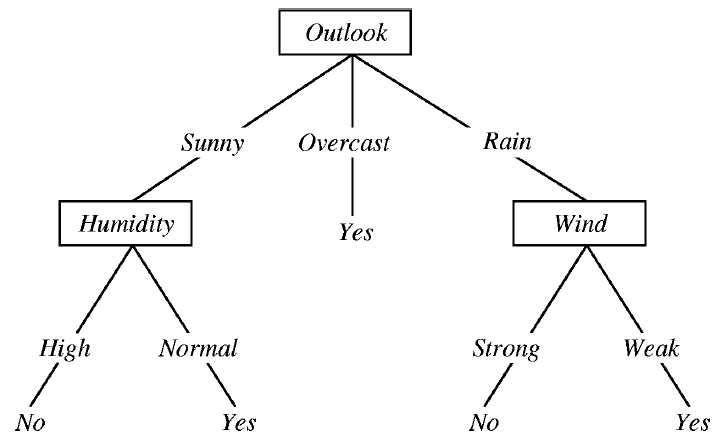

## Assignment

Now implement the complete ID3 algorithm yourself in a function or class, writing your code as generic as possible. This means that your function or class can also be applied to another dataset and not just to the dataset we used here as an example!

---
---
## Sources

- Leo Breiman, Jerome Friedman, Charles J. Stone, and Richard A. Olshen. Classification and regression trees. CRC press, 1984. - J. Ross Quinlan. Induction of decision trees. Machine Learning, 1(1):81-106, 1986. - Steven L Salzberg. C4.5: Programs for machine learning by J. Ross Quinlan. Morgan Kaufmann Publishers, inc., 1993. Machine Learning, 16(3):235-240, 1994.